<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-dataset-using-Keras" data-toc-modified-id="Loading-dataset-using-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading dataset using Keras</a></span><ul class="toc-item"><li><span><a href="#Test-Data-Generator" data-toc-modified-id="Test-Data-Generator-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Test Data Generator</a></span></li><li><span><a href="#Model-1" data-toc-modified-id="Model-1-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model 1</a></span></li><li><span><a href="#Define-Model-Architecture" data-toc-modified-id="Define-Model-Architecture-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Define Model Architecture</a></span></li><li><span><a href="#Compile-the-model" data-toc-modified-id="Compile-the-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Compile the model</a></span></li><li><span><a href="#Model-Learning" data-toc-modified-id="Model-Learning-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Model Learning</a></span></li></ul></li><li><span><a href="#Adding-Callbacks:-Model-V2" data-toc-modified-id="Adding-Callbacks:-Model-V2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Adding Callbacks: Model V2</a></span></li></ul></div>

In [18]:
import pandas as pd
#pandas.__version__

ImportError: cannot import name 'register_extension_dtype'

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import keras
import numpy
import matplotlib.pyplot as plt
import seaborn as sn

ModuleNotFoundError: No module named 'keras'

In [4]:
train_ds_location = '../../data/tomatoes/train'
test_ds_location = '../../data/tomatoes/test'

## Loading dataset using Keras

In [1]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
train_gen = ImageDataGenerator(rescale=1.0/255)

In [3]:
BATCH_SIZE = 64

In [8]:
train_data = train_gen.flow_from_directory(train_ds_location,
                              target_size = (256,256),
                              batch_size = BATCH_SIZE,
                              class_mode = 'binary')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/tomatoes/train'

In [14]:
train_data.n

840

In [16]:
train_data.class_indices

{'healthy': 0, 'unhealthy': 1}

In [17]:
train_data.image_shape

(256, 256, 3)

In [18]:
X_batch, y_batch = next(train_data)

In [19]:
X_batch.shape

(64, 256, 256, 3)

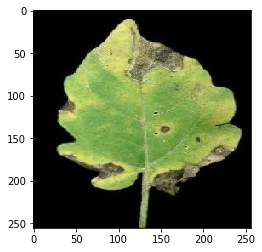

In [24]:
plt.imshow(X_batch[1])

In [23]:
y_batch[1]

1.0

In [27]:
X_batch[1].shape

(256, 256, 3)

In [43]:
import numpy as np

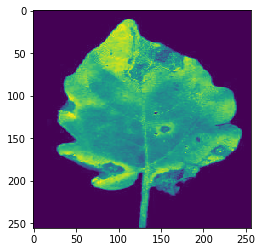

In [51]:
plt.imshow(np.array(X_batch[1])[:,:,0])

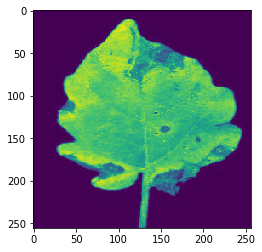

In [46]:
plt.imshow(np.array(X_batch[1])[:,:,1])

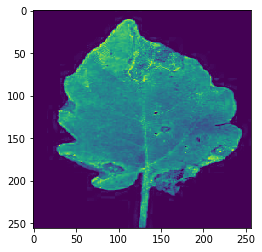

In [48]:
plt.imshow(X_batch[1][:,:,2])

### Test Data Generator

In [53]:
test_gen = ImageDataGenerator(rescale=1.0/255)

In [54]:
test_data = test_gen.flow_from_directory(test_ds_location,
                              target_size = (256,256),
                              batch_size = BATCH_SIZE,
                              class_mode = 'binary')

Found 200 images belonging to 2 classes.


### Model 1

In [77]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, Dropout

### Define Model Architecture

In [94]:
model_v1 = Sequential()

# Layer 1
model_v1.add(Conv2D(filters = 8,
                    kernel_size = (3,3),
                    input_shape = train_data.image_shape))
model_v1.add(MaxPool2D(pool_size=(2,2)))

# Layer 2
model_v1.add(Conv2D(filters = 4,
                    kernel_size = (3,3)))
model_v1.add(MaxPool2D(pool_size=(2,2)))

## Flatten
model_v1.add(Flatten())

# Layer 3
model_v1.add(Dense(32))
model_v1.add(Activation('relu'))
#model_v1.add(Dropout(0.1))

# Layer 4
model_v1.add(Dense(16))
model_v1.add(Activation('relu'))
#model_v1.add(Dropout(0.1))

# Layer 3
model_v1.add(Dense(1))
model_v1.add(Activation('sigmoid'))

In [95]:
model_v1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 254, 254, 8)       224       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 125, 125, 4)       292       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 4)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 15376)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                492064    
_________________________________________________________________
activation_13 (Activation)   (None, 32)                0         
__________

### Compile the model

In [86]:
model_v1.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics = ['accuracy'])

### Model Learning

In [87]:
EPOCHS = 10

In [88]:
history_v1 = model_v1.fit_generator(train_data,
                       epochs = EPOCHS,
                       validation_data = test_data)

Epoch 1/10
14/14 [==============================] - 17s 1s/step - loss: 0.6701 - acc: 0.5717 - val_loss: 0.5578 - val_acc: 0.7800
Epoch 2/10
14/14 [==============================] - 16s 1s/step - loss: 0.5602 - acc: 0.7281 - val_loss: 0.4322 - val_acc: 0.8550
Epoch 3/10
14/14 [==============================] - 16s 1s/step - loss: 0.4809 - acc: 0.7730 - val_loss: 0.3890 - val_acc: 0.8050
Epoch 4/10
14/14 [==============================] - 17s 1s/step - loss: 0.4503 - acc: 0.7976 - val_loss: 0.3290 - val_acc: 0.8850
Epoch 5/10
14/14 [==============================] - 17s 1s/step - loss: 0.3742 - acc: 0.8408 - val_loss: 0.3905 - val_acc: 0.8450
Epoch 6/10
14/14 [==============================] - 17s 1s/step - loss: 0.3250 - acc: 0.8627 - val_loss: 0.3244 - val_acc: 0.8750
Epoch 7/10
14/14 [==============================] - 17s 1s/step - loss: 0.2436 - acc: 0.9182 - val_loss: 0.2940 - val_acc: 0.8850
Epoch 8/10
14/14 [==============================] - 17s 1s/step - loss: 0.1893 - acc: 0.94

## Adding Callbacks: Model V2

In [96]:
model_v2 = Sequential()

# Layer 1
model_v2.add(Conv2D(filters = 8,
                    kernel_size = (3,3),
                    input_shape = train_data.image_shape))
model_v2.add(MaxPool2D(pool_size=(2,2)))

# Layer 2
model_v2.add(Conv2D(filters = 4,
                    kernel_size = (3,3)))
model_v2.add(MaxPool2D(pool_size=(2,2)))

## Flatten
model_v2.add(Flatten())

# Layer 3
model_v2.add(Dense(32))
model_v2.add(Activation('relu'))
#model_v1.add(Dropout(0.1))

# Layer 4
model_v2.add(Dense(16))
model_v2.add(Activation('relu'))
#model_v1.add(Dropout(0.1))

# Layer 3
model_v2.add(Dense(1))
model_v2.add(Activation('sigmoid'))

In [97]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [98]:
callback_list = [EarlyStopping(monitor='val_loss', patience=3),
                 ModelCheckpoint(filepath='plant_disease.h5',
                                 save_best_only=True),
                 ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.1,
                                   patience=2)]

In [101]:
model_v2.compile?

In [103]:
model_v2.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics = ['accuracy'])

In [104]:
history_v2 = model_v2.fit_generator(train_data,
                       epochs = EPOCHS,
                       callbacks = callback_list,                                    
                       validation_data = test_data)

Epoch 1/10
14/14 [==============================] - 17s 1s/step - loss: 0.7363 - acc: 0.5404 - val_loss: 0.6060 - val_acc: 0.7400
Epoch 2/10
14/14 [==============================] - 16s 1s/step - loss: 0.6143 - acc: 0.6665 - val_loss: 0.4756 - val_acc: 0.8250
Epoch 3/10
14/14 [==============================] - 16s 1s/step - loss: 0.5814 - acc: 0.6928 - val_loss: 0.4041 - val_acc: 0.8600
Epoch 4/10
14/14 [==============================] - 17s 1s/step - loss: 0.5245 - acc: 0.7270 - val_loss: 0.4066 - val_acc: 0.8100
Epoch 5/10
14/14 [==============================] - 17s 1s/step - loss: 0.4679 - acc: 0.7791 - val_loss: 0.3655 - val_acc: 0.8700
Epoch 6/10
14/14 [==============================] - 17s 1s/step - loss: 0.4337 - acc: 0.8257 - val_loss: 0.4477 - val_acc: 0.7450
Epoch 7/10
14/14 [==============================] - 16s 1s/step - loss: 0.3930 - acc: 0.8402 - val_loss: 0.4325 - val_acc: 0.7750
Epoch 8/10
14/14 [==============================] - 16s 1s/step - loss: 0.3440 - acc: 0.85